# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="../Automatidata/images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="../Automatidata/images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



* Outlier can best be identified through descriptive statistics and visualization. An effective visualization chart for outlier detection is a boxplot-that provides a quick visual summary of the variability of values in a dataset. Boxplot can answer questions such as are there any outlier in the dataset?

* Decision about how to deal with outlier depends on many variables such as the size of the dataset compared to outlier, the distribution of the outlier.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files.

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [ ]:
# Load dataset into dataframe
from google.colab import drive
drive.mount('/content/drive')
path_file = '/content/drive/MyDrive/TikTok/tiktok_dataset.csv'
data = pd.read_csv(path_file)

Mounted at /content/drive


<img src="../Automatidata/images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [ ]:
# Display and examine the first few rows of the dataframe
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [ ]:
# Get the size of the data
### YOUR CODE HERE ###
data.size

232584

In [ ]:
# Get the shape of the data
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [ ]:
# Get basic information about the data
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [ ]:
# Generate a table of descriptive statistics
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


* **Boxplot** will be helpful to visualize the spread and locality of group of values within quartile. It shows the distribution of *quantitative data* in a way that facilitates comparisons between variables or across levels of a categorical variable.

* **Histogram** shows the representation of a frequency distribution, which shows how frequently each value in a dataset or variable occurs. This will be helpful to visualize the numerical variables and provide answers to questions such as: what ranges does the observation covers? What is their central tendency? Are they heavily skewed to one direction? Is there evidence of bimodality?

* **Bar plot**: A bar plot represents an aggregate or statistical estimate for a numeric variable with the height of each rectangle and indicates the uncertainty around that estimate using an error bar.

<img src="../Automatidata/images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

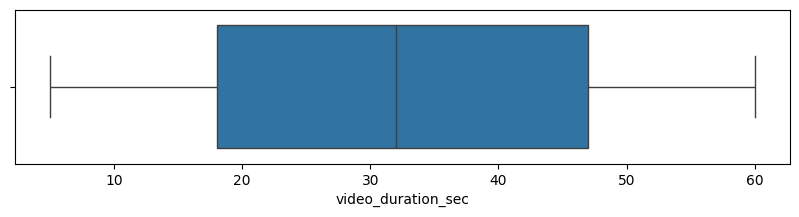

In [ ]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_duration_sec'])
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

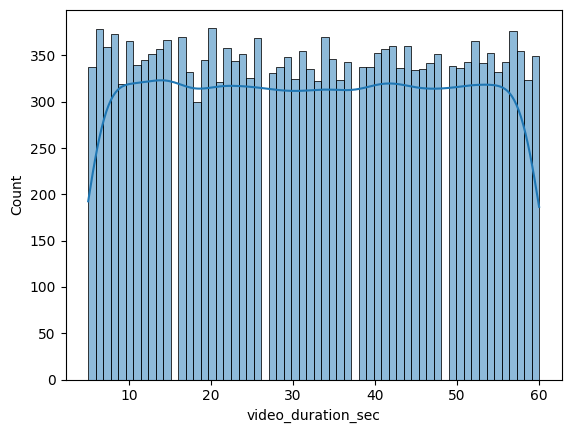

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x = data['video_duration_sec'],bins=60, kde=True)
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?

* The duration ranges from 4-60 secs with a mediam value of about 32 seconds. There are no outlier values in the dataset. The distribution of video duration is not normally distributed. There an even distribution of videos of different length in the dataset.

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

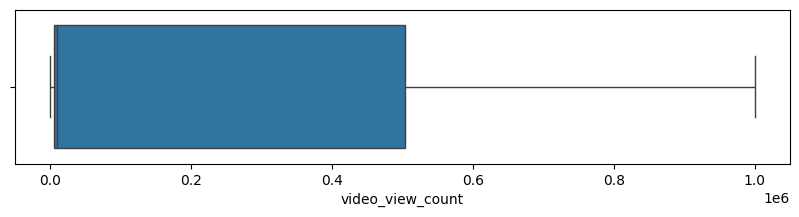

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_view_count'])
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

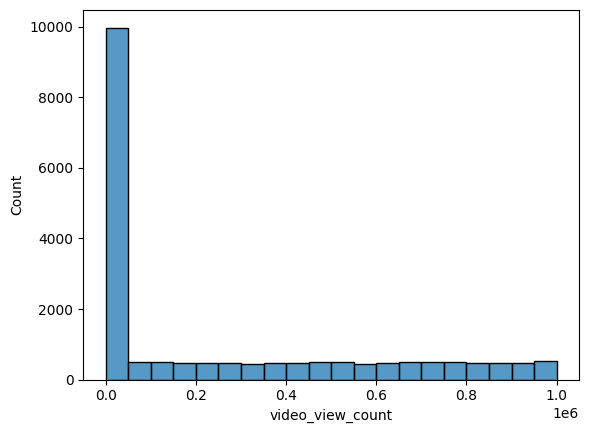

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x = data['video_view_count'], bins = 20)
plt.show()

**Question:** What do you notice about the distribution of this variable?
* The histogram show an extreme right skew in the distribution of the video view count. Most vidoes in the dataset have lower view count. The boxplot shows the median value is closer to the first quartile which is to zero. The whisker extending to right indicates a long tail of high views.

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

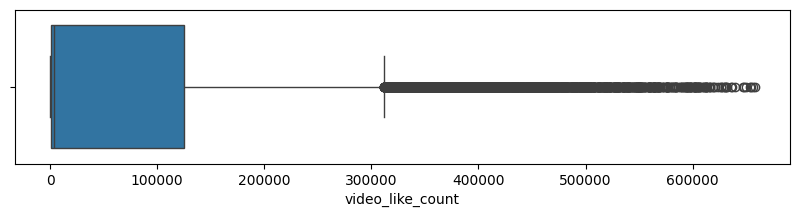

In [ ]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_like_count'])
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

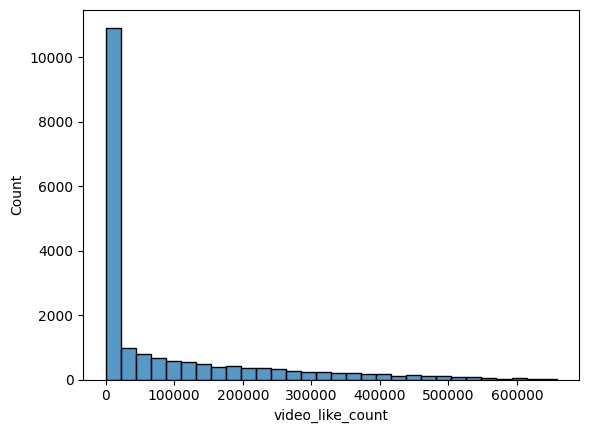

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x = data['video_like_count'], bins = 30)
plt.show()

**Question:** What do you notice about the distribution of this variable?
* The distribution follow a similar pattern as the `video_view_count` with an addition of outliers. The boxplot shows the median like count is close to zero, when videos with like greater than 300,00 are considered to be outliers. The histogram show an extreme right skew distribution of the `video_like_count`. Also an indication that more video have less likes compared to videos with high like counts

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

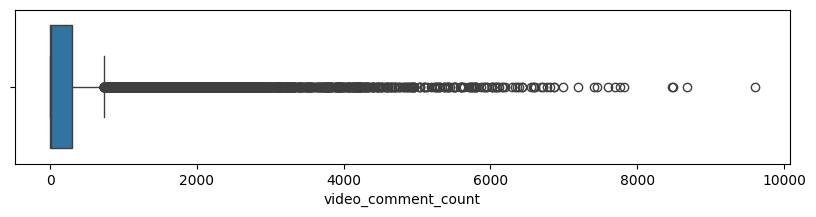

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_comment_count'])
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

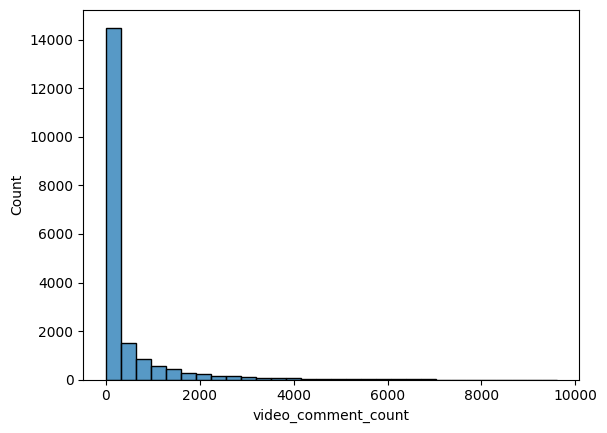

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x = data['video_comment_count'], bins = 30)
plt.show()

**Question:** What do you notice about the distribution of this variable?
* From the boxplot and histogram, I noticed the distribution of the video comment count is skewed to extremely to the right with the median value close to zero. The boxplot indicate there are outlier values in the comment counts. Most of the vidoes have less comment counts.

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

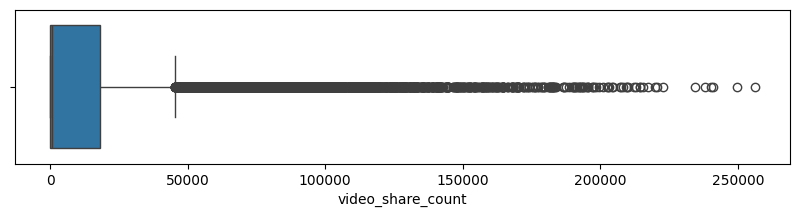

In [ ]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_share_count'])
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

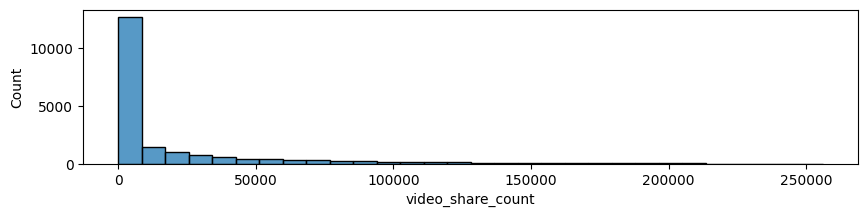

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(10,2))
sns.histplot(x = data['video_share_count'], bins = 30)
plt.show()

**Question:** What do you notice about the distribution of this variable?
* A similar pattern obverved in the distribution of video comment count can observed here too.

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

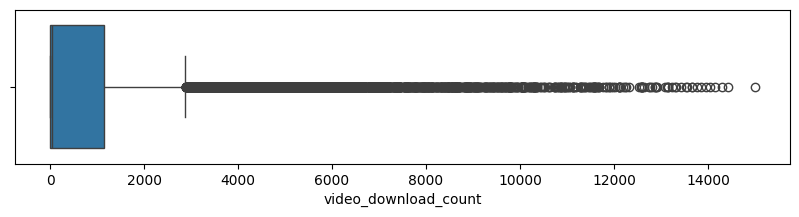

In [ ]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###
fig = plt.figure(figsize=(10,2))
sns.boxplot(x=data['video_download_count'])
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

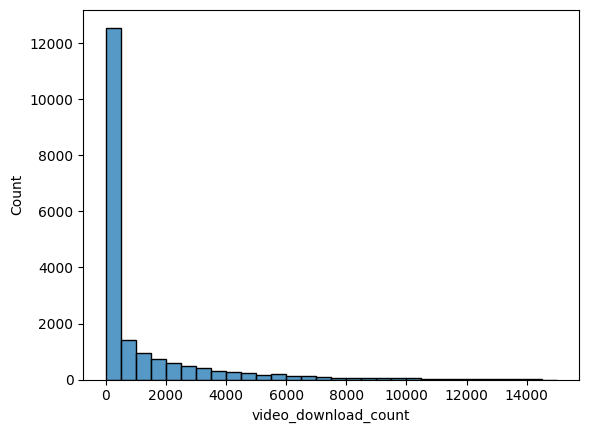

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x = data['video_download_count'], bins = 30)
plt.show()

**Question:** What do you notice about the distribution of this variable?
* This distribution of the video download count shows the median value is close to zero with long tail of values that are outliers. This histogram indicates that more vidoes are downloaded less than 200 times.

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

In [ ]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


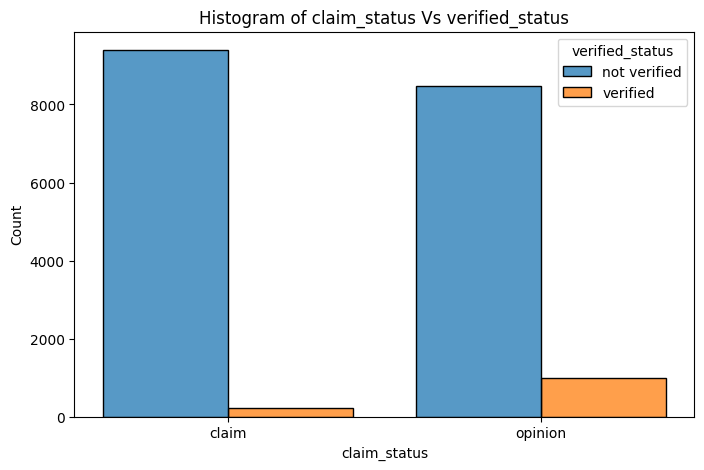

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize=(8,5))
sns.histplot(data=data, x='claim_status', hue='verified_status', multiple='dodge', shrink=0.8)
plt.title('Histogram of claim_status Vs verified_status')
plt.show()

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

* The number vidoes by verified users are less compared to number of unverified users. The chart also shows that verified users post more opinion videos compared to videos with claims.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

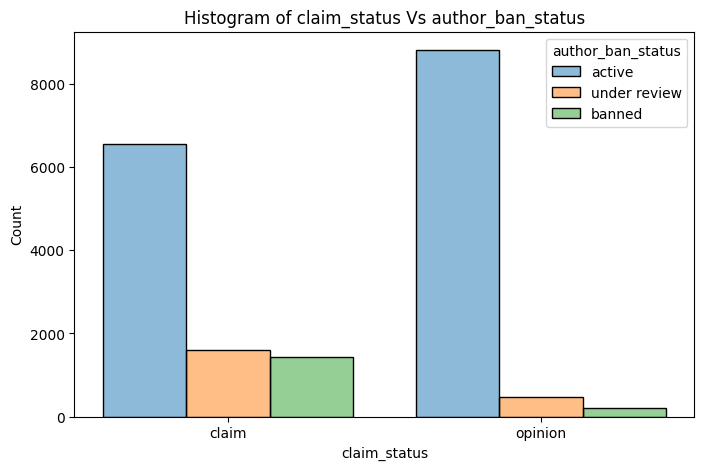

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
fig = plt.figure(figsize=(8,5))
sns.histplot(data = data, x = 'claim_status', hue='author_ban_status', shrink =0.8, multiple = 'dodge',
             hue_order = ['active','under review','banned'], alpha = 0.5
)
plt.title('Histogram of claim_status Vs author_ban_status')
plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

* The number of active authors is both higher compared to banned authors for both claims and opinions status. There are however more active authors and less number of banned authors in the opinion status category.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

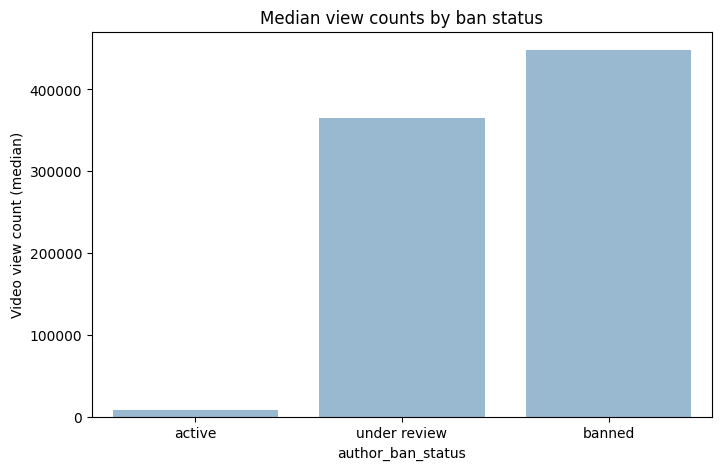

In [ ]:
# Create a bar plot
### YOUR CODE HERE ###
fig = plt.figure(figsize=(8,5))
sns.barplot(data, x = 'author_ban_status', y = 'video_view_count', estimator = 'median', errorbar = None, order = ['active','under review','banned'], alpha = 0.5)
plt.title('Median view counts by ban status')
plt.ylabel("Video view count (median)")
plt.show()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

* The median view counts for non-active authors are many times greater than the median view count for active authors. Since I know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then `video_view_count` might be a good indicator of claim status.

* Indeed, a quick check of the median view count by claim status bears out this assessment:

In [ ]:
# Calculate the median view count for claim status.
### YOUR CODE HERE ###
data.groupby(['claim_status'])['video_view_count'].median()

,video_view_count
claim_status,
claim,501555.0
opinion,4953.0


#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

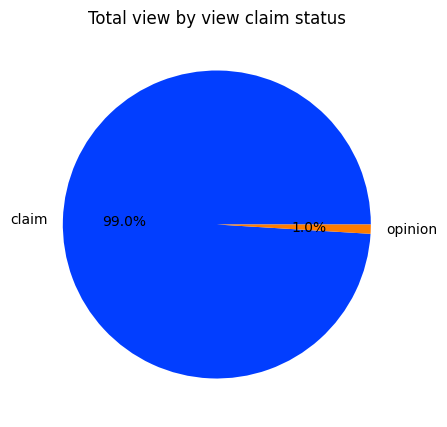

In [ ]:
# Create a pie graph
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]
plt.pie(data.groupby(["claim_status"])["video_view_count"].sum(), labels=["claim", "opinion"],
        colors=colors, autopct='%.1f%%')
plt.title("Total view by view claim status");

In [ ]:
data['claim_status'].value_counts()

,count
claim_status,
claim,9608
opinion,9476


**Question:** What do you notice about the overall view count for claim status?

* The overall view count is dominated by claim videos at 99% even though there are roughly the same number of each video in the dataset.

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the number of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [ ]:
### YOUR CODE HERE ###video_share_count
count_variables = ["video_view_count", "video_like_count",
                   "video_share_count", "video_download_count", "video_comment_count"]

for _, col in enumerate(count_variables):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    median = data[col].median()
    outlier_threshold = median + 1.5*IQR
    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[col] > outlier_threshold).sum()
    print(f"Number of outliers, {col}: {outlier_count}")


Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

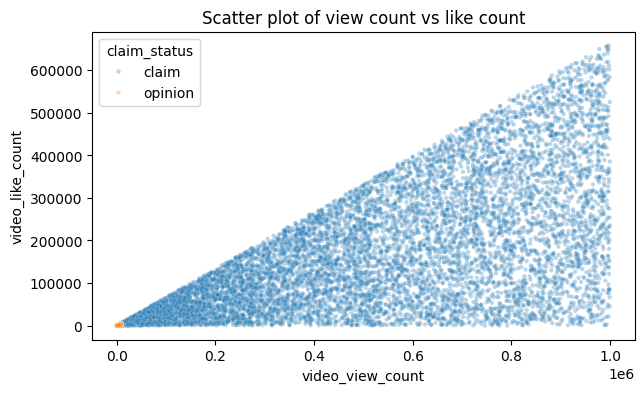

In [ ]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
### YOUR CODE HERE ###
plt.figure(figsize=(7,4))
sns.scatterplot(data, x="video_view_count", y="video_like_count", hue="claim_status",
               s=10, alpha=.3)
plt.title("Scatter plot of view count vs like count");

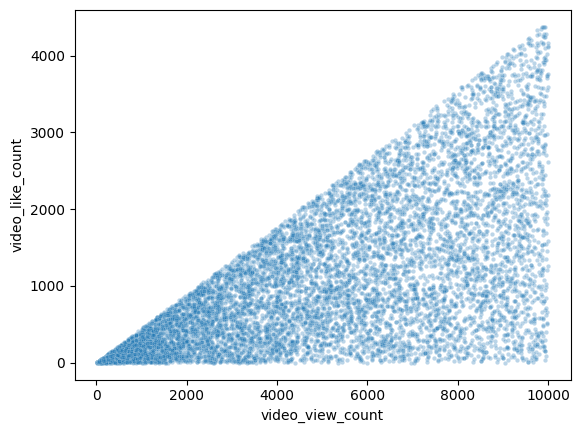

In [ ]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
### YOUR CODE HERE ###
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="../Automatidata/images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


==> ENTER YOUR RESPONSE HERE

I have learned ....
* *I have learned about data distribution/spread, count frequencies, mean and median values, outliers, missing data, and more. I also analyzed correlations between variables, particularly between the claim_status variable and others.*

My other questions are ....
* Besides the count variables, I like to investigate what other variables would be helpful to understand the data.
* Also, I will to investigate what variables are corellated to the each class of claim.
My client would likely want to know ...
* Some of my assumptions
* How the observations from the data, impact the business.


### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

* *EDA helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.*

Visualizations helped me understand ..

* *That we will need to make decisions on certain considerations prior to designing a model. (for example, what to do with outliers, duplicate values, or missing data)*


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.